In [1]:
# These are the steps to create the model
# step 1 : load the data
# step 2 : Prepare the data
# step 2 (i) : Clean the data
# step 2 (ii): Data exploration through visualization
# step 2 (iii): Feature Engg (Modify cols, create new cols, drop cols, combine cols)
# step 3 : Split the data into input and target variables
# step 4 : Split the input data and the target data into train and test sets
# step 5 : Intiate the model
# step 6 : Train the model
# Step 7: Evaluate the model
# Step 8: Save the model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_california_housing
cal_data= fetch_california_housing()
cal_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# Convert dictonaries to dataframe
df= pd.DataFrame(cal_data.data, columns= cal_data.feature_names)
df['MedHouseVal']= cal_data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


<Axes: xlabel='Latitude', ylabel='Longitude'>

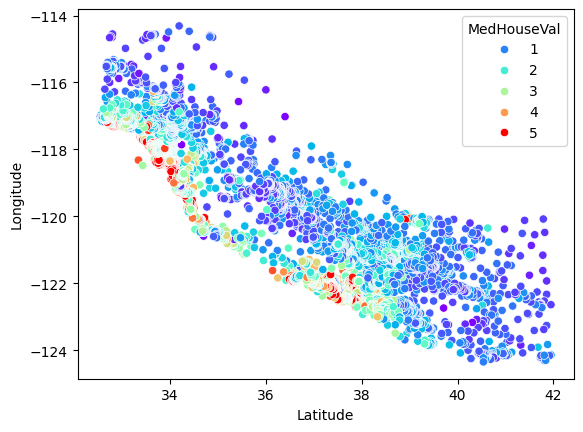

In [8]:
sns.scatterplot(x='Latitude', y='Longitude', data= df, hue='MedHouseVal', palette='rainbow' )

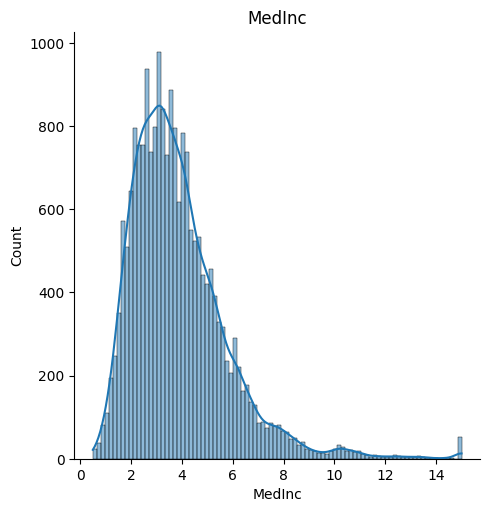

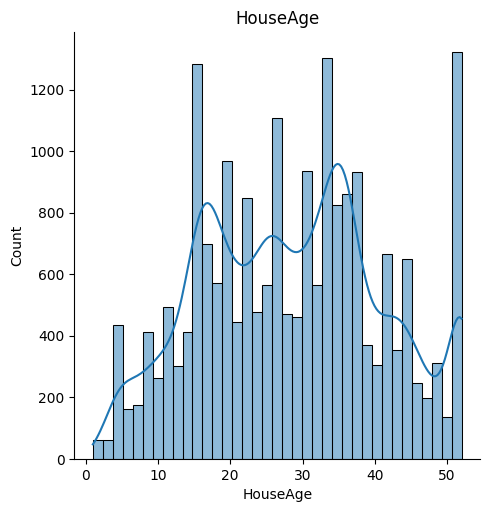

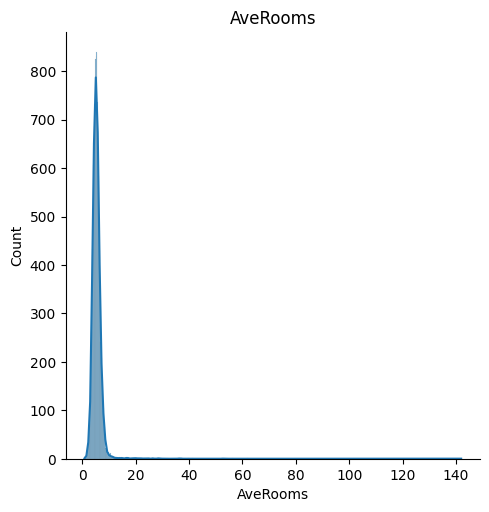

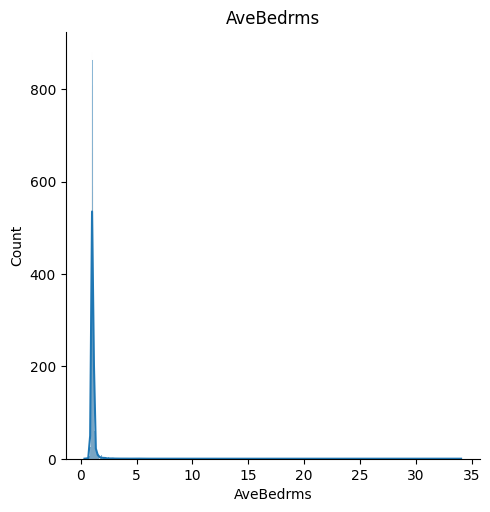

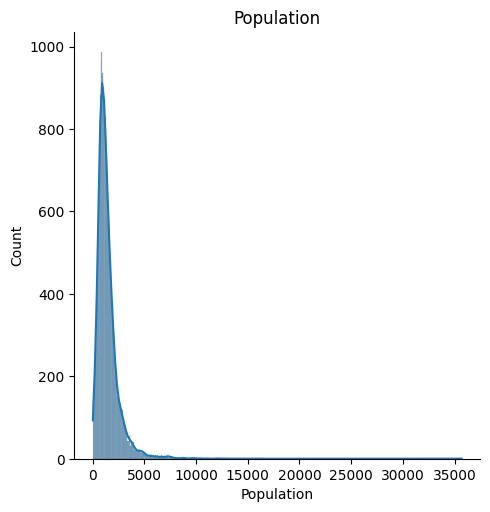

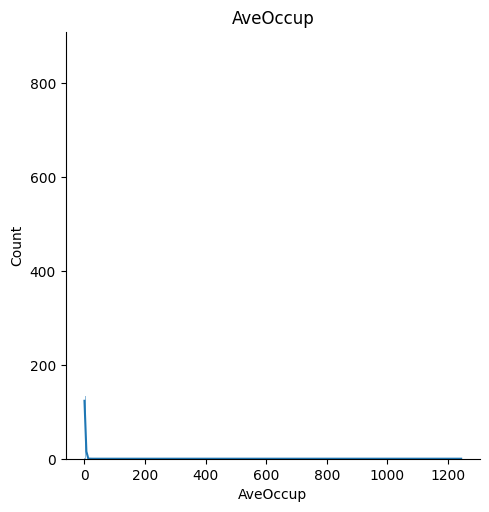

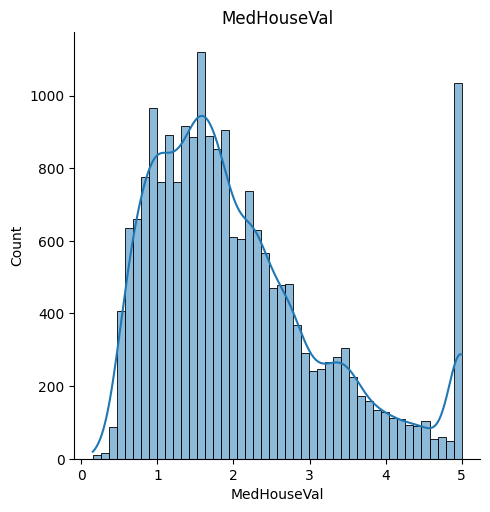

In [10]:
l=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal']

for i in l:
    sns.displot(df[i], kde=True)
    plt.title(i)
    plt.show()

In [11]:
# Converting "MedInc" and "MedHouseVal" column Value

df['MedInc']= df['MedInc']*10000
df['MedHouseVal']= df['MedHouseVal']*100000
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,83252.0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,83014.0,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,72574.0,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,56431.0,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,38462.0,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...,...,...
20635,15603.0,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0
20636,25568.0,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0
20637,17000.0,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0
20638,18672.0,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0


<Axes: >

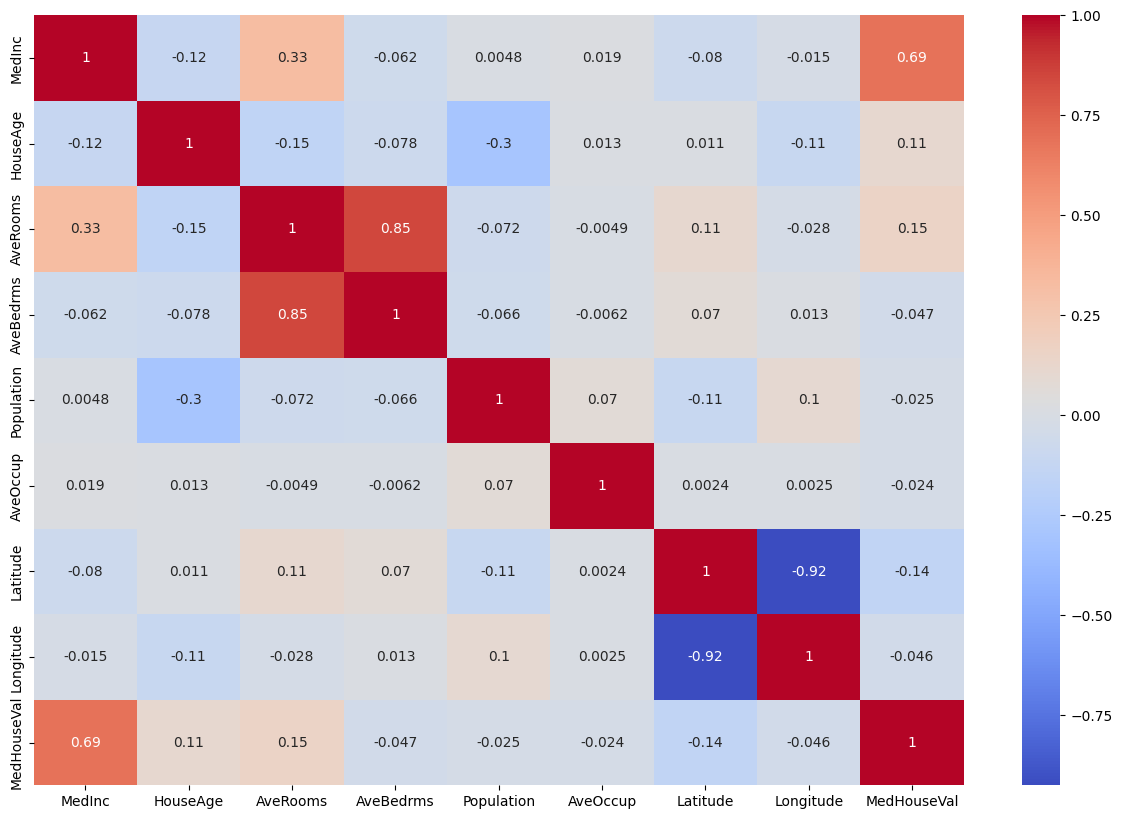

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [14]:
# Split the data into input and target variable
X= df.drop('MedHouseVal', axis= 1) # Input Variables
y= df['MedHouseVal'] # Target Varibales

In [15]:
# Split the input and target data into Train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

In [16]:
# Initiate the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [17]:
# Train the model
model.fit(X_train, y_train) # Fit the model to the training data

LinearRegression()

In [18]:
# Make prediction for the test data
y_pred= model.predict(X_test)

In [19]:
# Evaluate the model
# Manual Evaluation

eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df['Absolute_error'] = eval_df['Actual'] - eval_df['Predicted']
eval_df['Squared_error'] = eval_df['Absolute_error']**2
print(eval_df['Absolute_error'].mean())
print(eval_df['Squared_error'].mean())
print

116.01983997608127
5411287478.470689


<function print>

In [20]:
SSE = eval_df['Absolute_error']**2
SST = eval_df['Actual'] - eval_df['Actual'].mean()**2
r2 = 1 - SSE.sum()/SST.sum()
print(r2)

1.127123541499421


In [21]:
# Import the Metrix Module

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean absolute error: ',mean_absolute_error(y_test, y_pred))
print('Mean squared error: ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: ',r2_score(y_test, y_pred))

Mean absolute error:  52969.64012919459
Mean squared error:  5411287478.470689
Root Mean Squared Error: 73561.45375446769
R2 Score:  0.591050979549135


In [22]:
model.coef_, model.intercept_

(array([ 4.47600069e+00,  9.56752596e+02, -1.24755956e+04,  7.94471254e+04,
        -1.43902596e-01, -3.44307993e+02, -4.18555257e+04, -4.33405135e+04]),
 -3702782.758526944)

**So, we can represent:**

y_pred = 4.476 * 'MedInc' + 956.75 * 'HouseAge' -12475.6 * 'AveRooms' + 79447.1 * 'AveBedrms'- 14.4 *'Population' -344.3 *'AveOccup' - 41855.6 *'Latitude'-43340.5 *'Longitude'-3702782.8

In [23]:
# Try to make Model more accurate. Notice each Column and identify which one is not making more impact on output.
# Based on that, we will drop this two column "AveOccup" and "Population"

In [24]:
# drop two column "AveOccup" and "Population"
df = df.drop(['AveOccup', 'Population'], axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Latitude,Longitude,MedHouseVal
0,83252.0,41.0,6.984127,1.023810,37.88,-122.23,452600.0
1,83014.0,21.0,6.238137,0.971880,37.86,-122.22,358500.0
2,72574.0,52.0,8.288136,1.073446,37.85,-122.24,352100.0
3,56431.0,52.0,5.817352,1.073059,37.85,-122.25,341300.0
4,38462.0,52.0,6.281853,1.081081,37.85,-122.25,342200.0
...,...,...,...,...,...,...,...
20635,15603.0,25.0,5.045455,1.133333,39.48,-121.09,78100.0
20636,25568.0,18.0,6.114035,1.315789,39.49,-121.21,77100.0
20637,17000.0,17.0,5.205543,1.120092,39.43,-121.22,92300.0
20638,18672.0,18.0,5.329513,1.171920,39.43,-121.32,84700.0


In [25]:
# After dropping those two column, we will get same output.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean absolute error: ',mean_absolute_error(y_test, y_pred))
print('Mean squared error: ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score: ',r2_score(y_test, y_pred))

Mean absolute error:  52969.64012919459
Mean squared error:  5411287478.470689
Root Mean Squared Error: 73561.45375446769
R2 Score:  0.591050979549135


R2 Score : Tells you the proprtion of variation in the dependent variable that is explained by the independent  variable in a regression model.

It measure the goodness of fit of the model to the observed data, indicating how well the model predictions match the actual data points.

Value stands for 0 to 1. And, it can't be Negative.

[Here We can say that, Model predictions are based on 59% independent variable, other 41% is unknown.  ]

In [26]:
model.coef_, model.intercept_

(array([ 4.47600069e+00,  9.56752596e+02, -1.24755956e+04,  7.94471254e+04,
        -1.43902596e-01, -3.44307993e+02, -4.18555257e+04, -4.33405135e+04]),
 -3702782.758526944)

In [28]:
# Now, Save this Model

import pickle

pickle.dump(model, open('model_Lin_Reg.pkl', 'wb'))